In [55]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer , WordNetLemmatizer
ps = PorterStemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StopWordRemoverFactory()
stopwords2 = factory.get_stop_words()
stemmer = StemmerFactory().create_stemmer()

In [2]:
train=pd.read_csv("public-train.csv",sep='|')
test=pd.read_csv("public-test.csv",sep='|')
train

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,Original Edition,448.0,NaN,NaN,NaN,NaN,NaN,...,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,NaN,478.0,NaN,NaN,NaN,NaN,NaN,...,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,First Edition,352.0,NaN,NaN,NaN,NaN,NaN,...,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
(train.isnull().sum()/train.shape[0])*100

author_id          0.281690
description        1.070423
bookformat         0.366197
bookedition       93.492958
pages              2.788732
published_date    84.000000
publisher_id      84.000000
reading_age       96.450704
lexile_measure    97.521127
grade_level       97.183099
weight            85.380282
rating_value_0     0.281690
rating_value_1    84.422535
rating_count_0     0.000000
rating_count_1     0.000000
dimension_0       85.577465
dimension_1       85.577465
dimension_2       85.943662
genre_0            4.225352
genre_1            5.549296
genre_2            6.422535
genre_3            6.985915
genre_4            7.887324
genre_5            8.732394
genre_6            9.521127
genre_7           10.647887
genre_8           11.661972
genre_9           12.676056
genre_0_weight     4.225352
genre_1_weight     5.549296
genre_2_weight     6.422535
genre_3_weight     6.985915
genre_4_weight     7.887324
genre_5_weight     8.732394
genre_6_weight     9.521127
genre_7_weight    10

In [4]:
train.drop("price",axis=1)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,...,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,...,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,...,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,...,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,Original Edition,448.0,NaN,NaN,NaN,NaN,NaN,...,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,NaN,478.0,NaN,NaN,NaN,NaN,NaN,...,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,First Edition,352.0,NaN,NaN,NaN,NaN,NaN,...,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in train.columns:
    if (train[col].isnull().sum()/train.shape[0])*100 >20 and col!='price':
        train=train.drop(col,1)

In [6]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,309.0,3.76,26625,1,Historical Fiction,Fiction,Historical,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,4.48,21,1,Memoir,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,496.0,4.56,59885,1,Nonfiction,History,Politics,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,418.0,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,784.0,3.93,11772,1,History,Nonfiction,Russia,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,448.0,4.19,172198,1,Romance,New Adult,Contemporary,...,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,478.0,4.21,43149,1,Fantasy,Science Fiction,Adult,...,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,352.0,3.55,5811,1,Cookbooks,Cooking,Nonfiction,...,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,4.64,14,1,Historical Romance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
(train.isnull().sum()/train.shape[0])*100

author_id          0.281690
description        1.070423
bookformat         0.366197
pages              2.788732
rating_value_0     0.281690
rating_count_0     0.000000
rating_count_1     0.000000
genre_0            4.225352
genre_1            5.549296
genre_2            6.422535
genre_3            6.985915
genre_4            7.887324
genre_5            8.732394
genre_6            9.521127
genre_7           10.647887
genre_8           11.661972
genre_9           12.676056
genre_0_weight     4.225352
genre_1_weight     5.549296
genre_2_weight     6.422535
genre_3_weight     6.985915
genre_4_weight     7.887324
genre_5_weight     8.732394
genre_6_weight     9.521127
genre_7_weight    10.647887
genre_8_weight    11.661972
genre_9_weight    12.676056
price             84.704225
dtype: float64

In [8]:
train.iloc[1,1]

'Blame it on Hawaii’s rainbows, sparkling beaches, fruity cocktails, and sensuous breezes. For Heather Diamond, there for a summer course on China, a sea change began when romance bloomed with Fred, an ethnomusicologist from Hong Kong.One night under a full moon, Fred tells Heather the story of Chang’e, the moon goddess. He points out how the shadows form a rabbit pounding an elixir of immortality, but all Heather sees in the moon is a man’s face.Returning to her teaching job in Texas, Heather wonders if the whirlwind affair was a moment of madness. She is, after all, forty-five years old, married, a mother and grandmother.Rabbit in the Moon follows Heather and Fred’s relationship as well as Heather’s challenges with multiple mid-life reinventions, such as moving to Hawaii, entering a Ph.D. program, and living in a dorm with students half her age.When Fred goes on sabbatical, Heather finds herself on the Hong Kong island of Cheung Chau with his large, boisterous family. For an independ

In [9]:
train.loc[90]

author_id                                                author0708
description       For years, rumors of the “Marsh Girl” haunted ...
bookformat                                                Hardcover
pages                                                           370
rating_value_0                                                 4.47
rating_count_0                                              1236851
rating_count_1                                                    1
genre_0                                                     Fiction
genre_1                                          Historical Fiction
genre_2                                                     Mystery
genre_3                                                   Audiobook
genre_4                                                   Book Club
genre_5                                                       Adult
genre_6                                                     Romance
genre_7                                         

In [10]:
genre=[]
for i in range(train.shape[0]):
    genre += list(train.iloc[i,7:17].values)
genre=list(set(genre))

In [11]:
genre=genre[1:]

In [12]:
[i for i in genre if "Fiction" in i]

['Womens Fiction',
 'Young Adult Historical Fiction',
 'Young Adult Science Fiction',
 'Science Fiction',
 'Military Science Fiction',
 'Military Fiction',
 'Science Fiction Fantasy',
 'Hard Science Fiction',
 'Science Fiction Romance',
 'Historical Fiction',
 'Adult Fiction',
 'Fiction',
 'Literary Fiction',
 'Weird Fiction',
 'Speculative Fiction',
 'Climate Change Fiction',
 'Christian Fiction',
 'Realistic Fiction',
 'Christian Non Fiction']

In [13]:
train.iloc[2,3]

496.0

In [14]:
train.bookformat.value_counts()

Hardcover                2524
Paperback                 714
Kindle Edition            201
Mass Market Paperback      43
ebook                      42
Board Book                  3
Nook                        3
paperback                   2
Library Binding             1
Spiral-bound                1
Trade Paperback             1
Unknown Binding             1
Comics                      1
Name: bookformat, dtype: int64

In [15]:
for i in range(train.shape[0]):
    if train["bookformat"][i] in ["paperback","Trade Paperback"]:
        train["bookformat"][i] = "Paperback"
    else:
        if not (train["bookformat"][i] in ["Hardcover","Paperback","Kindle Edition","Mass Market Paperback","ebook"]):
            train["bookformat"][i] = "other"

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
arr_hapus=[]
for i in range(train.shape[0]):
    arr=list(train.iloc[i,7:17].values)
    if all([pd.isnull(i) for i in arr]):
        arr_hapus.append(i)

In [17]:
arr_hapus

[17,
 27,
 44,
 76,
 83,
 85,
 89,
 93,
 136,
 140,
 195,
 197,
 255,
 294,
 298,
 326,
 327,
 379,
 475,
 563,
 576,
 584,
 606,
 675,
 680,
 689,
 787,
 795,
 807,
 827,
 832,
 870,
 884,
 925,
 926,
 947,
 989,
 1006,
 1014,
 1036,
 1040,
 1081,
 1120,
 1126,
 1130,
 1145,
 1179,
 1210,
 1220,
 1237,
 1243,
 1266,
 1269,
 1289,
 1303,
 1326,
 1344,
 1380,
 1410,
 1434,
 1438,
 1444,
 1490,
 1513,
 1516,
 1522,
 1523,
 1528,
 1547,
 1553,
 1559,
 1561,
 1564,
 1573,
 1645,
 1647,
 1678,
 1729,
 1731,
 1743,
 1751,
 1791,
 1802,
 1856,
 1950,
 1970,
 2038,
 2041,
 2076,
 2181,
 2205,
 2209,
 2214,
 2218,
 2222,
 2269,
 2270,
 2277,
 2285,
 2339,
 2349,
 2354,
 2364,
 2373,
 2391,
 2399,
 2406,
 2504,
 2510,
 2540,
 2555,
 2648,
 2649,
 2663,
 2684,
 2691,
 2695,
 2714,
 2715,
 2726,
 2737,
 2753,
 2767,
 2842,
 2845,
 2847,
 2859,
 2877,
 2972,
 2987,
 2989,
 2991,
 3028,
 3054,
 3081,
 3106,
 3127,
 3171,
 3222,
 3232,
 3284,
 3285,
 3290,
 3332,
 3349,
 3355,
 3394,
 3408,
 3525,
 3

In [18]:
copy_df=train
for i in range(train.shape[0]):
    if i in arr_hapus:
        train=train.drop(i)

In [19]:
train=train.reset_index().drop("index",1)

In [20]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,309.0,3.76,26625,1,Historical Fiction,Fiction,Historical,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,4.48,21,1,Memoir,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,496.0,4.56,59885,1,Nonfiction,History,Politics,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,418.0,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,784.0,3.93,11772,1,History,Nonfiction,Russia,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,Paperback,448.0,4.19,172198,1,Romance,New Adult,Contemporary,...,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,478.0,4.21,43149,1,Fantasy,Science Fiction,Adult,...,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3397,author1309,Following the launch of her #1 New York Times ...,Hardcover,352.0,3.55,5811,1,Cookbooks,Cooking,Nonfiction,...,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3398,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,4.64,14,1,Historical Romance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train.isnull().sum()

author_id            0
description          8
bookformat           0
pages               22
rating_value_0       0
rating_count_0       0
rating_count_1       0
genre_0              0
genre_1             47
genre_2             78
genre_3             98
genre_4            130
genre_5            160
genre_6            188
genre_7            228
genre_8            264
genre_9            300
genre_0_weight       0
genre_1_weight      47
genre_2_weight      78
genre_3_weight      98
genre_4_weight     130
genre_5_weight     160
genre_6_weight     188
genre_7_weight     228
genre_8_weight     264
genre_9_weight     300
price             2908
dtype: int64

In [22]:
train.update(train.pages.fillna(train.pages.mean()))

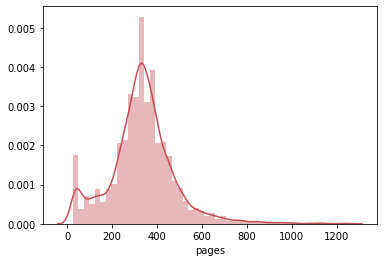

In [23]:
import seaborn as sns
sns.set_color_codes()
ax = sns.distplot(train.pages, color="r")

In [24]:
x=train.pages
normalized_pages = (x-x.mean())/x.std()

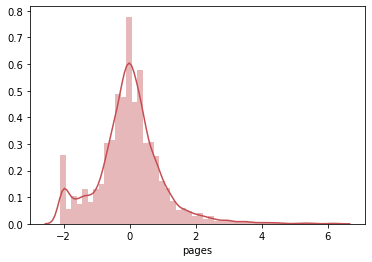

In [25]:
ax = sns.distplot(normalized_pages, color="r")

In [26]:
train["pages"]=normalized_pages

In [27]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,-0.167515,3.76,26625,1,Historical Fiction,Fiction,Historical,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,0.000000,4.48,21,1,Memoir,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,1.103450,4.56,59885,1,Nonfiction,History,Politics,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,0.573315,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,3.060873,3.93,11772,1,History,Nonfiction,Russia,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,Paperback,0.777213,4.19,172198,1,Romance,New Adult,Contemporary,...,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,0.981112,4.21,43149,1,Fantasy,Science Fiction,Adult,...,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3397,author1309,Following the launch of her #1 New York Times ...,Hardcover,0.124739,3.55,5811,1,Cookbooks,Cooking,Nonfiction,...,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3398,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,0.000000,4.64,14,1,Historical Romance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
matriks=[]
for i in range(train.shape[0]):
    arr=[]
    for item in genre:
        if item in list(train.iloc[i,7:17].values):
            for j in range(10):
                if (item==train.iloc[i,7+j]):
                    weight=train.iloc[i,17+j]
                    arr.append(weight)
        else:
            arr.append(0)
    matriks.append(arr)
    print(i,end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 

In [29]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(matriks)
matriks_genre=transformer.transform(matriks)

In [30]:
matriks_genre

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.95779494,
        0.        ]])

In [31]:
book_format=pd.get_dummies(train.bookformat)
book_format

,Hardcover,Kindle Edition,Mass Market Paperback,Paperback,ebook,other
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3395,0,0,0,1,0,0
3396,1,0,0,0,0,0
3397,1,0,0,0,0,0
3398,0,1,0,0,0,0


In [32]:
from sklearn.decomposition import PCA
dfku=pd.concat([book_format,train[["pages"]],pd.DataFrame(matriks_genre)],axis=1)
pca = PCA()
x_pca = pca.fit_transform(dfku)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,...,-4.084624e-18,7.489166e-18,7.991158e-18,-4.289744e-18,-7.311607e-18,-4.839406e-18,1.624369e-17,-1.161753e-17,-9.646613e-19,5.409053e-18
1,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,...,1.065817e-17,-2.648938e-16,-7.643053e-18,4.134649e-17,-2.033599e-16,4.086954e-17,-1.605588e-17,6.101666e-17,1.353960e-16,-1.037235e-16
2,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,...,1.991206e-17,3.239776e-17,-4.827796e-17,-2.764010e-17,9.357418e-17,8.800649e-17,-1.309690e-16,3.122687e-17,-9.848403e-18,-8.128987e-17
3,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,...,3.799629e-17,7.157923e-17,-3.028261e-17,-3.091472e-17,5.839274e-17,-8.649112e-18,2.852804e-17,5.512450e-17,-1.366205e-17,3.265219e-18
4,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,...,4.881260e-19,2.414929e-18,1.928689e-18,-1.215025e-18,-3.113406e-19,-9.087674e-19,1.342093e-18,-1.188228e-19,3.249306e-18,2.997554e-18


In [33]:
explained_variance = pca.explained_variance_ratio_*100

In [34]:
sum(list(explained_variance)[:12])

86.0030834706503

In [35]:
explained_variance

array([4.57379955e+01, 1.42898640e+01, 6.31936010e+00, 4.00536765e+00,
       3.18262831e+00, 2.51349740e+00, 2.04600568e+00, 1.81590775e+00,
       1.67804614e+00, 1.54484569e+00, 1.51452537e+00, 1.35503989e+00,
       1.15589152e+00, 1.12832437e+00, 1.07919780e+00, 9.76348939e-01,
       8.25825740e-01, 7.37597615e-01, 6.73030669e-01, 6.20776680e-01,
       4.77599917e-01, 4.11015184e-01, 3.66904412e-01, 2.79099114e-01,
       2.58920035e-01, 2.54375935e-01, 2.28591643e-01, 2.08141733e-01,
       1.91307136e-01, 1.68078783e-01, 1.64971794e-01, 1.60729853e-01,
       1.42038802e-01, 1.32089249e-01, 1.30672678e-01, 1.24153064e-01,
       1.17699682e-01, 1.13308995e-01, 1.09073364e-01, 9.92319718e-02,
       9.03968898e-02, 8.42607970e-02, 8.35479899e-02, 7.91519509e-02,
       7.50045296e-02, 7.44049619e-02, 7.34380060e-02, 7.02569181e-02,
       6.97384845e-02, 6.27094518e-02, 6.20958646e-02, 5.95772044e-02,
       5.82319141e-02, 5.46883338e-02, 5.30976520e-02, 5.03263878e-02,
      

In [36]:
fix_pca=x_pca.iloc[:,:12]
fix_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [37]:
valid_price=[i for i in train.price.values if not pd.isnull(i)]
valid_price=np.array(valid_price).reshape(1,492)

In [38]:
fix_train=pd.concat([train[["author_id","description","price"]],fix_pca],axis=1)

In [39]:
fix_train

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,NaN,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,NaN,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,author1309,Following the launch of her #1 New York Times ...,NaN,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,author1816,"Bachelors, beware. For those who keep secrets ...",NaN,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [40]:
fix_train.to_csv("fix_train.csv")

In [41]:
first_train=fix_train
first_train=first_train.drop(["author_id","description"],axis=1)
for i in range(fix_train.shape[0]):
    if pd.isnull(first_train["price"][i]):
        first_train=first_train.drop(i)
first_train=first_train.reset_index().drop("index",1)

In [42]:
first_train.to_csv("first_train.csv")

In [43]:
first_train

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,98172.0,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,103658.0,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,649665.0,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,117806.0,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,122281.0,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,262176.0,0.174485,-0.289967,-0.300402,-0.409919,-0.105975,0.093890,-0.043952,-0.436218,0.125325,-0.392736,0.185444,0.090773
488,216411.0,-0.451888,-0.375512,-0.361667,-0.372522,-0.108425,0.104928,-0.076506,-0.296454,0.009990,-0.266875,0.143643,-0.008798
489,152310.0,0.727562,-0.328748,0.691782,-0.000861,-0.056800,-0.007380,-0.087931,0.014412,-0.037473,0.074821,0.084137,0.222676
490,176853.0,-1.794564,-0.538316,-0.293321,-0.081501,-0.011625,0.042347,-0.050229,0.020944,-0.044228,-0.024945,-0.110339,-0.104717


In [44]:
valid_price

array([[ 98172., 103658., 649665., 117806., 122281., 122281., 189847.,
        225939., 349375., 115640., 140761., 230848., 209192., 198509.,
        227960., 149712., 111309., 375362., 428490., 114485., 114774.,
        215111., 268961., 176565., 119250., 216555., 321801., 548462.,
        165881., 125313.,  86478., 136285., 531282., 173244., 130655.,
        282532., 244852., 108278., 219876., 100770., 216411., 187681.,
        189702.,  97883., 115352., 173244., 129500., 340136.,  57748.,
        274159., 267951.,  43167., 279212., 288596., 260877., 237200.,
         64966., 230848., 146824., 211502., 202118., 417951., 232724.,
        437874., 257989., 179741., 245285., 247739., 725892., 284698.,
        317470., 112175., 155053., 120549., 113764., 287152., 400194.,
        249904., 196343., 330607., 230848., 115352., 121993., 143648.,
        285131., 236911., 115352., 257700., 237777., 182628., 245429.,
        187537., 555824., 281522., 144081., 232580., 472812., 125313.,
      

In [45]:
valid_price=[i for i in train.price.values if not pd.isnull(i)]

from sklearn.preprocessing import StandardScaler

valid_price=np.array(valid_price).reshape(492,1)
scaler = StandardScaler()
# transform data
scaled_price = scaler.fit_transform(valid_price)

df_price=pd.DataFrame(scaled_price).rename(columns={0:"price"})

In [46]:
train.loc[pd.isnull(train.price) != True]["price"]

9        98172.0
27      103658.0
31      649665.0
46      117806.0
47      122281.0
          ...   
3370    262176.0
3374    216411.0
3380    152310.0
3388    176853.0
3391    216555.0
Name: price, Length: 492, dtype: float64

In [47]:
for i,fix_price in zip(list(train.loc[pd.isnull(train.price)!=True].price.index),list(df_price.price.values)):
    train["price"][i]=fix_price

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
train.loc[pd.isnull(train.price)!=True]

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,author0932,"At long last, New York Times bestselling autho...",Mass Market Paperback,1.157823,4.29,26983,504,Paranormal Romance,Paranormal,Romance,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,-1.043160
27,author2386,"From Rob Thomas, the creator of groundbreaking...",Paperback,-0.065566,3.99,43657,1537,Mystery,Fiction,Audiobook,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,-1.003063
31,author2769,"Hannis Arc, working on the tapestry of lines l...",Hardcover,1.320942,3.68,19382,1504,Fantasy,Fiction,Epic Fantasy,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,2.987689
46,author2883,How come the only thing my family tree ever gr...,Hardcover,-0.201498,3.80,1415,60,Memoir,Nonfiction,Humor,...,0.25,0.22,0.04,0.03,0.03,0.03,0.03,0.03,0.02,-0.899656
47,author0441,The New York Times bestselling Mortal Instrume...,Hardcover,1.368518,4.25,454617,5533,Fantasy,Young Adult,Romance,...,0.24,0.09,0.09,0.06,0.05,0.04,0.04,0.03,0.03,-0.866948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,author1012,"Harlan Coben, the master of domestic suspense,...",Hardcover,0.117943,3.83,71693,5943,Mystery,Thriller,Fiction,...,0.20,0.17,0.09,0.08,0.07,0.03,0.03,0.02,0.02,0.155541
3374,author0083,"Alexander McCall Smith’s beloved, bestselling ...",Hardcover,-0.520938,4.12,14157,1407,Mystery,Fiction,Africa,...,0.25,0.16,0.06,0.04,0.03,0.03,0.03,0.02,0.02,-0.178954
3380,author0975,From one of the most acclaimed and profound wr...,Hardcover,0.750027,3.84,7758,240,Nonfiction,Comics,History,...,0.23,0.07,0.07,0.06,0.05,0.03,0.03,0.03,0.02,-0.647467
3388,author0034,Go the Fuck to Sleep is a bedtime book for par...,Hardcover,-1.832683,4.26,85767,15504,Humor,Fiction,Picture Books,...,0.14,0.09,0.08,0.07,0.06,0.06,0.05,0.04,0.02,-0.468083


In [49]:
fix_train=pd.concat([train[["author_id","description","price"]],fix_pca],axis=1)
fix_train

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,NaN,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,NaN,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,author1309,Following the launch of her #1 New York Times ...,NaN,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,author1816,"Bachelors, beware. For those who keep secrets ...",NaN,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [50]:
first_train=fix_train
first_train=first_train.drop(["author_id","description"],axis=1)
for i in range(fix_train.shape[0]):
    if pd.isnull(first_train["price"][i]):
        first_train=first_train.drop(i)
first_train=first_train.reset_index().drop("index",1)
first_train

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.043160,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,-1.003063,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,2.987689,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,-0.899656,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,-0.866948,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.155541,0.174485,-0.289967,-0.300402,-0.409919,-0.105975,0.093890,-0.043952,-0.436218,0.125325,-0.392736,0.185444,0.090773
488,-0.178954,-0.451888,-0.375512,-0.361667,-0.372522,-0.108425,0.104928,-0.076506,-0.296454,0.009990,-0.266875,0.143643,-0.008798
489,-0.647467,0.727562,-0.328748,0.691782,-0.000861,-0.056800,-0.007380,-0.087931,0.014412,-0.037473,0.074821,0.084137,0.222676
490,-0.468083,-1.794564,-0.538316,-0.293321,-0.081501,-0.011625,0.042347,-0.050229,0.020944,-0.044228,-0.024945,-0.110339,-0.104717


In [51]:
fix_train.to_csv("fix_train.csv")
first_train.to_csv("first_train.csv")

In [52]:
train["description"][0]

"Just after the Second World War, in the small English village of Chawton, an unusual but like-minded group of people band together to attempt something remarkable.One hundred and fifty years ago, Chawton was the final home of Jane Austen, one of England's finest novelists. Now it's home to a few distant relatives and their diminishing estate. With the last bit of Austen's legacy threatened, a group of disparate individuals come together to preserve both Jane Austen's home and her legacy. These people—a laborer, a young widow, the local doctor, and a movie star, among others—could not be more different and yet they are united in their love for the works and words of Austen. As each of them endures their own quiet struggle with loss and trauma, some from the recent war, others from more distant tragedies, they rally together to create the Jane Austen Society."

In [56]:
import re
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X
def stopward_stem_en(X):
    stop_words = set(stopwords.words('english'))
    #Stopword Removal
    X=' '.join([i for i in X.split() if i not in stop_words])
    #Stemming of data
    X=' '.join([ps.stem(i) for i in X.split()])
    return X
kata = train["description"][0]
stopward_stem_en(token_satu_kata(kata))

'second world war small english villag chawton unusu like mind group peopl band togeth attempt someth remark one hundr fifti year ago chawton final home jane austen one england finest novelist home distant rel diminish estat last bit austen legaci threaten group dispar individu come togeth preserv jane austen home legaci peopl labor young widow local doctor movi star among other could differ yet unit love work word austen endur quiet struggl loss trauma recent war other distant tragedi ralli togeth creat jane austen societi'

In [54]:
print(3)

3
